### Plan

    1) Load and read in the data
    2) Get an overview of the data
    3) Check for missing and unique values
    4) Check for outliers
    5) Basic visualization of the data
    6) Model Selection
    7) Model Evaluation
    8) Conclusion / Next Steps

In [1]:
import numpy as np
import pandas as pd
import sqlalchemy as sa
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

%matplotlib inline

In [2]:
"""Load data from a flat file into a sqlite database."""

def load_csv_to_sql(file_path, database='data.db', tablename='ForestCoverage'):
    """Function definition to convert csv into SQLite3"""
    data = pd.read_csv(file_path)
    engine = sa.create_engine(f'sqlite:///{database}')
    data.to_sql(tablename, engine, index=False)

if __name__ == '__main__':
    # TODO: Fill in path to train_data.csv
    file_path = '../data/train_data.csv'
    load_csv_to_sql(file_path)

In [3]:
def load_data(database, tablename):
    """Load the data from Sqlite3 into pandas dataframe."""

    df = pd.read_sql_table(tablename, database)
    
    return df

---

In [4]:
# Loading the data into a Pandas df

df = load_data('sqlite:///data.db', 'ForestCoverage')

In [5]:
df.head(3)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology.1,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Label,Soil_Type,Wilderness_Area
0,2804,139,9,268,65,3180,234,238,135,6121,1,Soil_Type11,Wilderness_Area0
1,2785,155,18,242,118,3090,238,238,122,6211,1,Soil_Type29,Wilderness_Area0
2,2579,132,6,300,-15,67,230,237,140,6031,1,Soil_Type28,Wilderness_Area0


In [6]:
# Cleaning up the column names

df.rename(columns={"Horizontal_Distance_To_Hydrology.1": "Horizontal_Distance_To_Roadway"}, inplace=True)

In [7]:
# Getting general info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326793 entries, 0 to 326792
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           326793 non-null  int64 
 1   Aspect                              326793 non-null  int64 
 2   Slope                               326793 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    326793 non-null  int64 
 4   Vertical_Distance_To_Hydrology      326793 non-null  int64 
 5   Horizontal_Distance_To_Roadway      326793 non-null  int64 
 6   Hillshade_9am                       326793 non-null  int64 
 7   Hillshade_Noon                      326793 non-null  int64 
 8   Hillshade_3pm                       326793 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  326793 non-null  int64 
 10  Label                               326793 non-null  int64 
 11  Soil_Type                           326

<b>This dataset contains 10 numerical features , 2 categorical features , and our target variable 'Label'</b>

In [8]:
# Checking shape for number of obervations and features

df.shape

(326793, 13)

<b>There are 326,793 observations</b>

In [9]:
# Checking for nulls -- from literature, should be none

df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadway        0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Label                                 0
Soil_Type                             0
Wilderness_Area                       0
dtype: int64

<b>No missing values were found</b>

In [10]:
# Checking for unique values in each feature column

df.nunique()

Elevation                             1493
Aspect                                 361
Slope                                   65
Horizontal_Distance_To_Hydrology       543
Vertical_Distance_To_Hydrology         690
Horizontal_Distance_To_Roadway        5785
Hillshade_9am                          202
Hillshade_Noon                         178
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Label                                    2
Soil_Type                               35
Wilderness_Area                          4
dtype: int64

In [11]:
# Descriptive statistics summary for numerical features

df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadway,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Label
count,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000,326793.000000
mean,2967.862023,145.154523,12.634628,259.570789,39.548546,2845.105712,214.673546,223.608985,141.108053,2308.181121,0.649237
std,196.001939,111.673887,6.924092,202.200011,52.990079,1688.671598,24.237692,17.530001,34.919579,1474.368002,0.477210
min,2142.000000,0.000000,0.000000,0.000000,-159.000000,0.000000,46.000000,30.000000,0.000000,0.000000,0.000000
25%,2840.000000,53.000000,8.000000,108.000000,6.000000,1401.000000,203.000000,214.000000,120.000000,1253.000000,0.000000
50%,2974.000000,108.000000,12.000000,216.000000,25.000000,2601.000000,220.000000,226.000000,141.000000,2011.000000,1.000000
75%,3104.000000,248.000000,16.000000,366.000000,57.000000,4203.000000,232.000000,236.000000,163.000000,2875.000000,1.000000
max,3686.000000,360.000000,64.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000


In [12]:
# Checking to see the class balance 

Spruce_Fir = df[df['Label'] == 0]
Lodgepole_Pine  = df[df['Label'] == 1]

print('Spruce_Fir: {:d}, Lodgepole_Pine: {:d}'.format(len(Spruce_Fir), len(Lodgepole_Pine)))

Spruce_Fir: 114627, Lodgepole_Pine: 212166


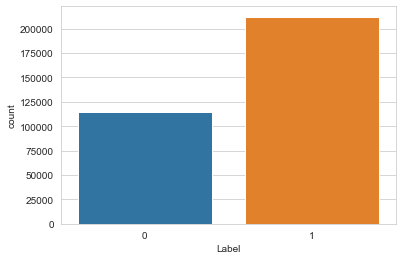

In [13]:
# Visualization of the target variable count

sns.countplot(x = df['Label'],label="Sum")

plt.show()

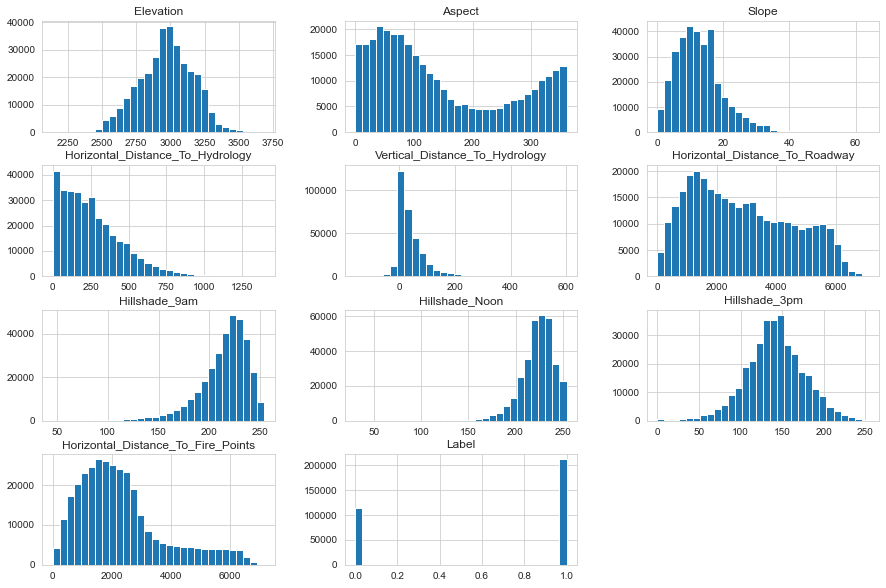

In [14]:
# Distribution plots of the features 

df.hist(bins=30, figsize=(15, 10)) ;

<b>While 'Elevation' and 'Hillshade_3pm' are relatively normally distributed, there is positive skewness in 'Slope', 'Horizontal_Distance_To_Hydrology', & 'Horizontal_Distance_To_Fire_Points' and negative skewness for 'Hillshade_9am' and 'Hillshade_Noon'</b>

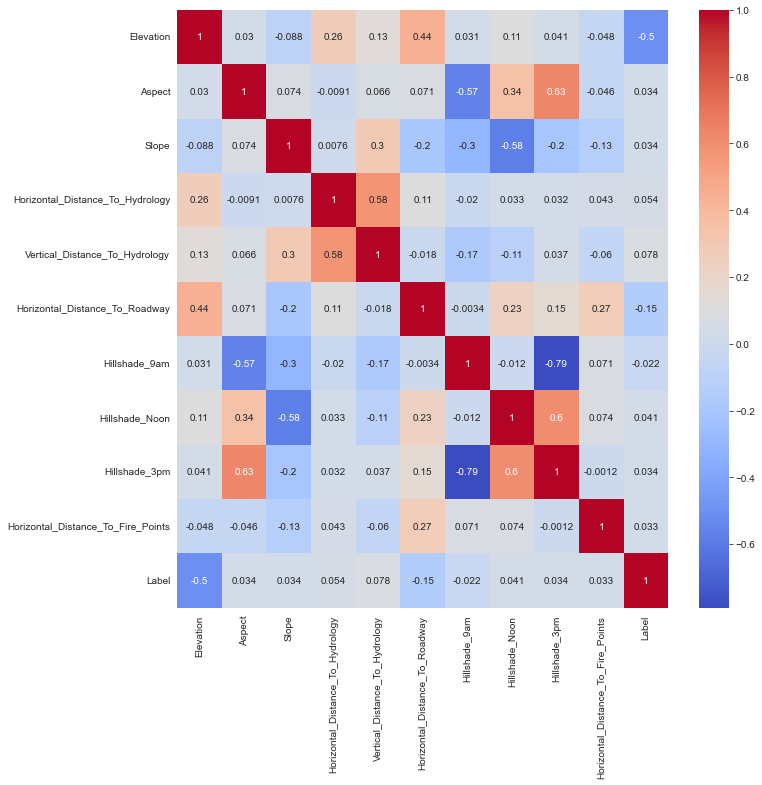

In [15]:
# Correlation plot to check for redundant info

plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

In [16]:
# Wilderness - Soil relationship
# 0 - Rawah , 1 - Neota , 2 - Comanche Peak , 3 - Cache la Poudre

df.groupby(['Wilderness_Area']).Soil_Type.describe(include=['O'])

,count,unique,top,freq
Wilderness_Area,,,,
Wilderness_Area0,237256,17,Soil_Type28,111082
Wilderness_Area1,247,15,Soil_Type22,65
Wilderness_Area2,86264,25,Soil_Type31,24919
Wilderness_Area3,3026,7,Soil_Type9,1871


<b>Because there are multiple soil types per wilderness, I'm choosing to eliminate this column</b>

In [17]:
# Dropping the Soil Type col

df = df.drop(columns=['Soil_Type'])
df.shape

(326793, 12)

In [18]:
# One-Hot encoding the four wilderness areas for ease of use in models

dummy_wilderness = pd.get_dummies(df['Wilderness_Area'])

print(dummy_wilderness)

        Wilderness_Area0  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3
0                      1                 0                 0                 0
1                      1                 0                 0                 0
2                      1                 0                 0                 0
3                      1                 0                 0                 0
4                      1                 0                 0                 0
...                  ...               ...               ...               ...
326788                 0                 0                 1                 0
326789                 0                 0                 1                 0
326790                 0                 0                 1                 0
326791                 0                 0                 1                 0
326792                 0                 0                 1                 0

[326793 rows x 4 columns]


In [19]:
# Merging one hot encoded variables onto the original data

df = pd.merge(left=df, right=dummy_wilderness, left_index=True, right_index=True)

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadway,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Label,Wilderness_Area,Wilderness_Area0,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3
0,2804,139,9,268,65,3180,234,238,135,6121,1,Wilderness_Area0,1,0,0,0
1,2785,155,18,242,118,3090,238,238,122,6211,1,Wilderness_Area0,1,0,0,0
2,2579,132,6,300,-15,67,230,237,140,6031,1,Wilderness_Area0,1,0,0,0
3,2886,151,11,371,26,5253,234,240,136,4051,1,Wilderness_Area0,1,0,0,0
4,2742,134,22,150,69,3215,248,224,92,6091,1,Wilderness_Area0,1,0,0,0


In [20]:
# The columns you want to search for outliers in

cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadway',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'] 

# Calculate quantiles and IQR
Q1 = df[cols].quantile(0.25) 
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_df = df[condition].reindex()

In [21]:
print('Number of Outliers:',len(df)-len(filtered_df))

Number of Outliers: 60347


In [22]:
# Observe new transformed dataframe shape

filtered_df.shape

(266446, 16)

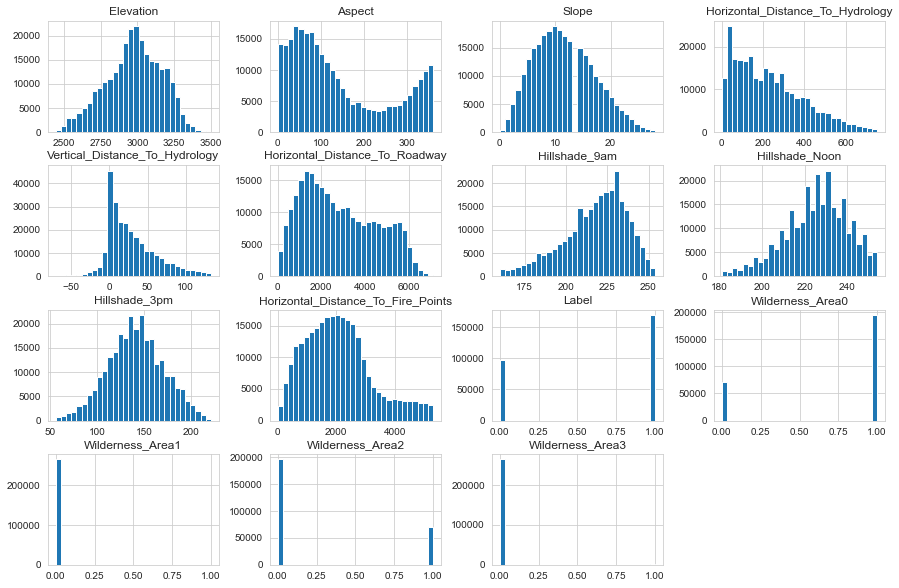

In [23]:
# Checking to see how removing outliers impacted feature distributions

filtered_df.hist(bins=30, figsize=(15, 10)) ;

<b>Here we can see the effect of removing the outliers</b>

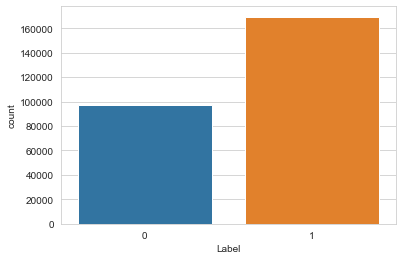

In [24]:
sns.countplot(x = filtered_df['Label'],label="Sum")

plt.show()

In [25]:
# Forgot to drop original wilderness area col, will do now

filtered_df = filtered_df.drop(columns = ['Wilderness_Area'])

### We have a class imbalance of roughly 2:1 , will use undersampling of the majority class

In [26]:
# Getting the number of rows in minority class

row_num = filtered_df.Label.value_counts().min() 

In [27]:
final_df = pd.DataFrame()

for i in filtered_df.Label.unique():
    final_df = pd.concat([final_df,filtered_df[filtered_df.Label==i].sample(row_num)])

In [28]:
# We now have equal classes for our models

final_df.Label.value_counts()

1    97002
0    97002
Name: Label, dtype: int64

### Now that we have balanced classes , it's time to start preprocessing 

In [29]:
# Define our X (independent variables) , y (target variable) for use in modeling
 
X = final_df.drop("Label", axis = 1)
y = final_df["Label"]

In [30]:
# We need to split the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep=os.linesep)

(155203, 14)
(38801, 14)
(155203,)
(38801,)


### Standardization of the data

In [32]:
# Chose to use StandardScaler bc outliers were removed

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

----

### Modeling 

<b> In order to establish a good baseline model, I wanted to test several classification models to compare. From here, I'd then go about picking the best 2-3 for further fine tuning</b>

In [33]:
# Importing models from sklearn library

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, auc

LR: 0.760295 (0.002737)
KNN: 0.909364 (0.001559)
RF: 0.945201 (0.002507)
NB: 0.504848 (0.000277)
SVC: 0.759173 (0.002431)


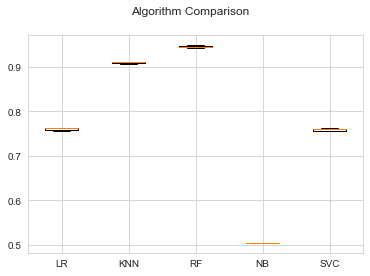

In [34]:
# prepare configuration for cross validation test 
seed = 42

# prepare models

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('SVC', LinearSVC()))

# evaluate each model for 'accuracy'
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    skfolds=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=skfolds, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Logistic Regression

In [35]:
logit = LogisticRegression()

In [36]:
logit.fit(X_train, y_train)

LogisticRegression()

In [37]:
target_probabilities = logit.predict_proba(X_test)[:,1]

In [38]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)


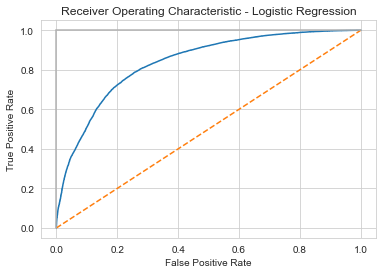

In [39]:
# Plot ROC curve

plt.title("Receiver Operating Characteristic - Logistic Regression")
plt.plot(false_positive_rate , true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [40]:
# Area under the curve (AUC)
roc_auc_score(y_test, target_probabilities)

0.8373822582324332

### KNN 

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
target_probabilities = knn.predict_proba(X_test)[:,1]

In [44]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)

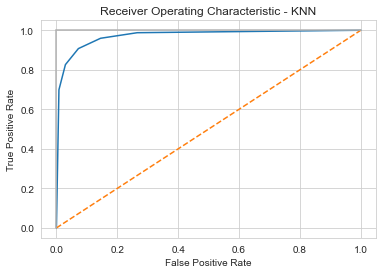

In [45]:
# Plot ROC curve

plt.title("Receiver Operating Characteristic - KNN")
plt.plot(false_positive_rate , true_positive_rate)
plt.plot([0,1],ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [46]:
# Area under the curve (AUC)
roc_auc_score(y_test, target_probabilities)

0.9712407273097348

## Conclusions and Next Steps



For this project we were asked to accurately predict two types of forest cover: Lodgepole Pines and Spruce/Fir

The dataset was a subset of the UCI 'Forest Covertype' ML dataset.

Initial inspection of the data showed the presence of outliers and an imbalance in the classes of around 2:1

Outliers were removed and classes were balanced

Undersampling was chosen to balance the classes due to the size of the majority class, however, other methods could have been attempted

Several models were chosen to compare for prediction accuracy: Logistic Regression, kNN, Random Forest, Naive Bayes, and Support Vector Machine

In this inital test, classifiers were run without any parameters (except RF) to give them equal footing

Accuracy results were best for kNN and Random Forest -- although they also need to be considered for time

I picked kNN , Random Forest , and Logistic Regression to test further although time was up before I got very far in tuning

Somethings I would do, given more time, would be checking for feature importance , visualizing a confusion matrix of the predictions , tuning hyperparams 

### Stopped here -- time up